<a href="https://colab.research.google.com/github/busrasagirr/python-dataset/blob/master/Proje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd           #kütüphaneleri ekliyoruz
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd "/content/drive/My Drive/Python Bootcamp/"

/content/drive/My Drive/Python Bootcamp


In [0]:
veri_nba=pd.read_csv("nba.games.stats.csv")   #veriyi çekiyoruz.
veri_nba

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29
5,6,ATL,6,2014-11-10,Away,NYK,W,91,85,27,71,0.380,10,27,0.370,27,28,0.964,9,38,20,7,3,15,16,36,83,0.434,6,26,0.231,7,12,0.583,11,40,23,4,2,15,26
6,7,ATL,7,2014-11-12,Home,UTA,W,100,97,39,76,0.513,9,20,0.450,13,18,0.722,13,46,23,8,4,18,12,43,86,0.500,5,23,0.217,6,12,0.500,8,30,28,12,8,11,17
7,8,ATL,8,2014-11-14,Home,MIA,W,114,103,42,75,0.560,11,28,0.393,19,23,0.826,3,36,33,10,5,13,20,35,74,0.473,10,21,0.476,23,25,0.920,5,32,27,10,3,14,20
8,9,ATL,9,2014-11-15,Away,CLE,L,94,127,40,90,0.444,3,22,0.136,11,13,0.846,11,37,26,6,8,18,12,49,90,0.544,19,31,0.613,10,13,0.769,12,47,39,12,2,13,14
9,10,ATL,10,2014-11-18,Home,LAL,L,109,114,41,85,0.482,9,27,0.333,18,23,0.783,13,38,22,7,3,10,17,47,87,0.540,6,17,0.353,14,22,0.636,13,44,24,7,0,11,24


In [0]:
veri_nba.isnull().values.any()

False

In [0]:
veri_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
Unnamed: 0                  9840 non-null int64
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds       

In [0]:
veri_nba.shape     

(9840, 41)

In [0]:
lal = veri_nba[veri_nba.Team == 'LAL']   # LAL = Los Angles Lakers
bos = veri_nba[veri_nba.Team == 'BOS']    # BOS = Boston Celtics

In [0]:
lal

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
1066,170,LAL,1,2014-10-28,Home,HOU,L,90,108,28,79,0.354,3,10,0.300,31,39,0.795,11,36,16,7,3,11,32,31,73,0.425,12,29,0.414,34,50,0.680,14,47,22,7,3,13,30
1067,270,LAL,2,2014-10-29,Away,PHO,L,99,119,37,86,0.430,4,13,0.308,21,25,0.840,12,38,20,9,3,13,18,45,82,0.549,16,32,0.500,13,18,0.722,9,40,23,5,3,14,25
1068,370,LAL,3,2014-10-31,Home,LAC,L,111,118,42,82,0.512,7,20,0.350,20,28,0.714,9,40,24,5,2,14,35,34,71,0.479,12,33,0.364,38,44,0.864,6,36,25,6,2,14,26
1069,470,LAL,4,2014-11-01,Away,GSW,L,104,127,41,88,0.466,4,14,0.286,18,25,0.720,17,37,21,9,3,22,27,46,83,0.554,11,23,0.478,24,28,0.857,12,43,30,10,4,20,26
1070,570,LAL,5,2014-11-04,Home,PHO,L,106,112,35,88,0.398,6,16,0.375,30,41,0.732,18,49,16,7,8,12,25,41,91,0.451,6,18,0.333,24,31,0.774,13,52,28,6,7,13,29
1071,670,LAL,6,2014-11-09,Home,CHO,W,107,92,42,82,0.512,6,17,0.353,17,22,0.773,8,38,28,8,2,11,23,35,79,0.443,3,14,0.214,19,27,0.704,12,39,15,5,0,11,18
1072,770,LAL,7,2014-11-11,Away,MEM,L,102,107,41,87,0.471,7,22,0.318,13,17,0.765,15,38,22,8,6,13,22,41,78,0.526,4,11,0.364,21,26,0.808,12,38,21,8,2,13,18
1073,832,LAL,8,2014-11-12,Away,NOP,L,102,109,35,84,0.417,7,21,0.333,25,32,0.781,11,38,15,8,5,9,14,45,82,0.549,8,19,0.421,11,18,0.611,8,44,27,3,12,13,24
1074,913,LAL,9,2014-11-14,Home,SAS,L,80,93,28,75,0.373,2,12,0.167,22,31,0.710,11,46,17,6,5,13,13,33,80,0.413,10,23,0.435,17,20,0.850,7,44,28,9,2,10,23
1075,1013,LAL,10,2014-11-16,Home,GSW,L,115,136,39,99,0.394,3,16,0.188,34,43,0.791,20,48,17,9,4,7,27,46,86,0.535,14,28,0.500,30,34,0.882,11,51,32,4,5,16,26


In [0]:
#date leri o-pandas ile datetime a çevirelim ve son sezona ait olmayanları çıkaralım.

lal.Date = lal.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
lal = lal[lal['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]

bos.Date = bos.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
bos = bos[bos['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
df_selected = lal.drop(['FieldGoals',	'FieldGoalsAttempted',	'FieldGoals.',	'X3PointShots',	'X3PointShotsAttempted',	'X3PointShots.',	'FreeThrows',	'FreeThrowsAttempted',	'FreeThrows.',	'OffRebounds',	'TotalRebounds',	'Assists',	'Steals',	'Blocks',	'Turnovers'], 
                        axis = 1)

In [0]:
df_selected

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
8446,1405,LAL,1,2017-10-19,Home,LAC,L,92,108,15,42,107,0.393,12,33,0.364,12,13,0.923,17,59,23,12,3,14,20
8447,2405,LAL,2,2017-10-20,Away,PHO,W,132,130,31,45,92,0.489,14,29,0.483,26,38,0.684,10,50,17,8,9,19,25
8448,3405,LAL,3,2017-10-22,Home,NOP,L,112,119,24,47,83,0.566,10,32,0.313,15,21,0.714,6,42,26,14,5,18,20
8449,4405,LAL,4,2017-10-25,Home,WAS,W,102,99,26,39,95,0.411,6,26,0.231,15,23,0.652,7,45,20,11,5,13,19
8450,5405,LAL,5,2017-10-27,Home,TOR,L,92,101,22,40,93,0.430,7,29,0.241,14,20,0.700,9,40,27,12,4,12,24
8451,6405,LAL,6,2017-10-28,Away,UTA,L,81,96,20,37,79,0.468,13,31,0.419,9,13,0.692,14,49,18,9,5,21,20
8452,7405,LAL,7,2017-10-31,Home,DET,W,113,93,14,41,94,0.436,10,33,0.303,1,3,0.333,10,44,21,7,3,12,11
8453,8208,LAL,8,2017-11-02,Away,POR,L,110,113,20,40,86,0.465,9,22,0.409,24,27,0.889,10,41,22,7,4,12,21
8454,9103,LAL,9,2017-11-03,Home,BRK,W,124,112,29,37,91,0.407,9,38,0.237,29,38,0.763,8,43,23,8,5,16,22
8455,10103,LAL,10,2017-11-05,Home,MEM,W,107,102,16,40,87,0.460,11,37,0.297,11,14,0.786,6,39,23,6,7,12,22


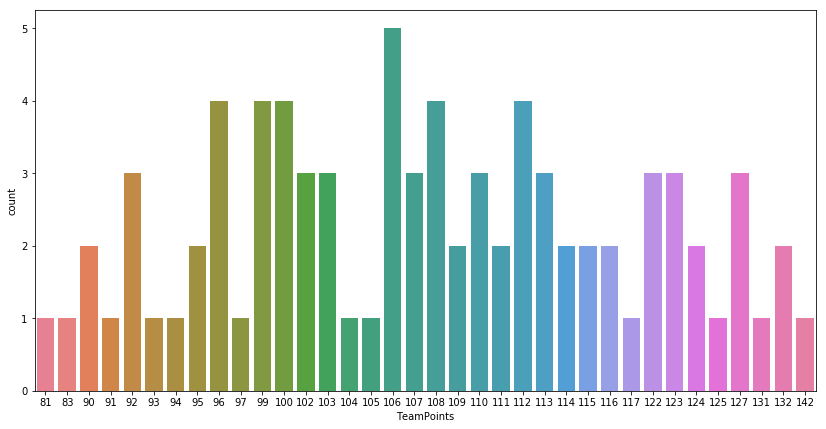

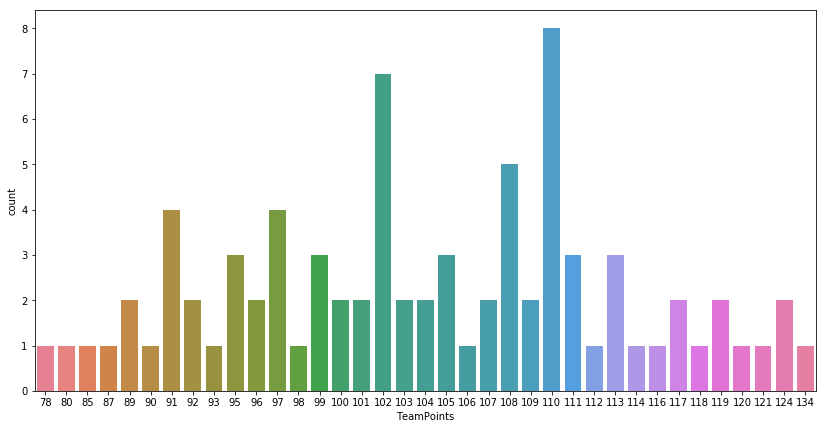

In [0]:
#Sezon boyunca iki takımın puanlarını karşılaştıralım (LAL == Mavi, BOS == Turuncu) 
#lal.TeamPoints.hist()
#bos.TeamPoints.hist()
fig= plt.subplots(figsize=(14,7))
sns.countplot(x='TeamPoints',data=lal,palette="husl" )
plt.show()

fig= plt.subplots(figsize=(14,7))
sns.countplot(x='TeamPoints',data=bos,palette="husl" )
plt.show()

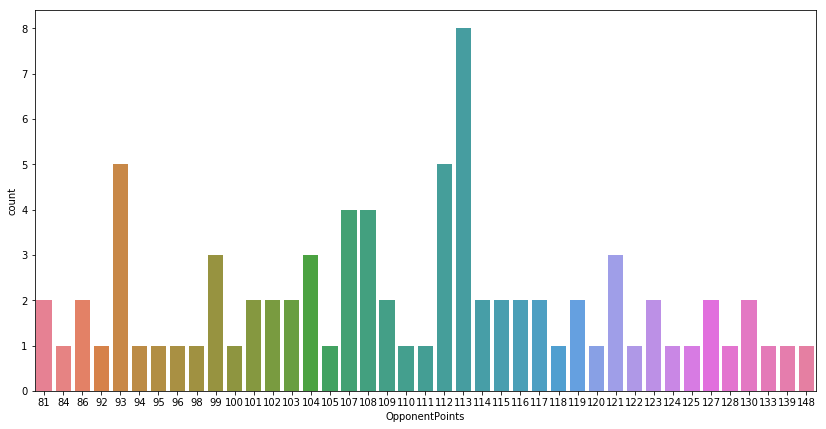

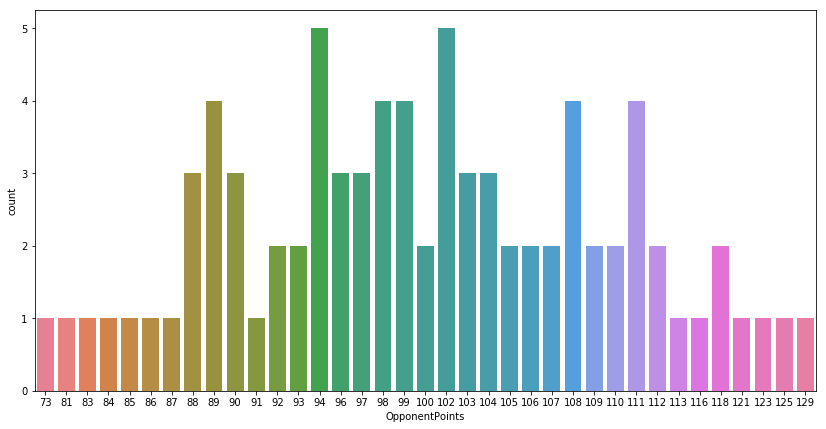

In [0]:
#Sezon boyunca iki takıma karşı atılan puanları karşılaştırın.

#lal.OpponentPoints.hist()
#bos.OpponentPoints.hist()

fig= plt.subplots(figsize=(14,7))
sns.countplot(x='OpponentPoints',data=lal,palette="husl" )
plt.show()

fig= plt.subplots(figsize=(14,7))
sns.countplot(x='OpponentPoints',data=bos,palette="husl" )
plt.show()

In [0]:
#Simülasyonda kullanılacak takımların başlangıç istatistiklerini hesaplayalım. (takım puanları ve karşı takım puanları için ortalama(mean) ve standartsapma(std))

lal_ortpuan = lal.TeamPoints.mean()
bos_ortpuan = bos.TeamPoints.mean()
lal_sspuan = lal.TeamPoints.std()
bos_sspuan = bos.TeamPoints.std()

lal_rakip_ortpuan = lal.OpponentPoints.mean()
bos_rakip_ortpuan = bos.OpponentPoints.mean()
lal_rakip_sspuan = lal.OpponentPoints.std()
bos_rakip_sspuan = bos.OpponentPoints.std()

print("Los Angles Lakers Puan Ortalaması: ", lal_ortpuan)
print("Los Angles Lakers Puanların Standart Sapması: ", lal_sspuan)
print("Boston Celtics Puan Ortalaması: ", bos_ortpuan)
print("Boston Celtics Puanların Standart Sapması: ", bos_sspuan)

print("Los Angles Lakers Rakiplerin Puan Ortalaması: ", lal_rakip_ortpuan)
print("Los Angles Lakers Rakiplerin Puanlarının Standart Sapması: ", lal_rakip_sspuan)
print("Boston Celtics Rakiplerin Puan Ortalaması: ", bos_rakip_ortpuan)
print("Boston Celtics Rakiplerin Puanlarının Standart Sapması: ", bos_rakip_sspuan)

Los Angles Lakers Puan Ortalaması:  108.07317073170732
Los Angles Lakers Puanların Standart Sapması:  12.100179049593406
Boston Celtics Puan Ortalaması:  104.01219512195122
Boston Celtics Puanların Standart Sapması:  10.400016503357067
Los Angles Lakers Rakiplerin Puan Ortalaması:  109.6219512195122
Los Angles Lakers Rakiplerin Puanlarının Standart Sapması:  12.947796651208572
Boston Celtics Rakiplerin Puan Ortalaması:  100.42682926829268
Boston Celtics Rakiplerin Puanlarının Standart Sapması:  10.67017359920435


In [0]:
#Rastgele örnekler için LAL_Skor değeri, BOS_Skor değerinden büyükse 1 döndürecek!

def gameSim():
    LAL_Skor = (rnd.gauss(lal_ortpuan,lal_sspuan)+ rnd.gauss(bos_rakip_ortpuan,bos_rakip_sspuan))/2
    BOS_Skor = (rnd.gauss(bos_ortpuan,bos_sspuan)+ rnd.gauss(lal_rakip_ortpuan,lal_rakip_ortpuan))/2
    if int(round(LAL_Skor)) > int(round(BOS_Skor)):
        return 1
    elif int(round(LAL_Skor)) < int(round(BOS_Skor)):
        return -1
    else: return 0

In [0]:
gameSim()

1

In [0]:
# ns= simülasyon sayısı
# gameSim() fonksiyonunu ne kadar çok çalıştırırsak o kadar iyi bir sonuç elde ederiz. Bu fonksiyonun amacı da gameSim() fonksiyonun çalıştımak.!

def gamesSim(ns):
    #gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        #gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('LAL Win ', team1win/(team1win+team2win+tie),'%')
    print('BOS Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return #gamesout

In [0]:
gamesSim(100)

LAL Win  0.53 %
BOS Win  0.47 %
Tie  0.0 %


In [0]:
gamesSim(1000)

LAL Win  0.461 %
BOS Win  0.535 %
Tie  0.004 %


In [0]:
gamesSim(10000)

LAL Win  0.4824 %
BOS Win  0.5106 %
Tie  0.007 %
